In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
# Combine the data into a single DataFrame
new_df = pd.merge(study_results, mouse_metadata, how='left',on="Mouse ID" )

# Display the data table for preview
new_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
new_df['Mouse ID'].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_rows = new_df[new_df.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mouse_ids = duplicate_rows['Mouse ID'].unique()
duplicate_mouse_ids


array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = new_df.loc[new_df['Mouse ID']=='g989']

duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [90]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = new_df[new_df['Mouse ID'].isin(duplicate_mouse_ids)==False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1299,c758,30,44.118270,1,Ramicane,Male,9,17
539,l509,10,46.759074,0,Capomulin,Male,17,21
1363,j913,30,34.757240,0,Ramicane,Female,4,17
918,u364,20,40.343948,2,Capomulin,Male,18,17
215,v991,0,45.000000,0,Propriva,Female,10,30
301,z969,5,49.332999,0,Naftisol,Male,9,30
519,p387,10,53.362963,0,Stelasyn,Male,3,30
379,u946,5,45.991808,1,Propriva,Male,5,30
725,c264,15,53.664942,1,Zoniferol,Female,11,27
505,r107,10,49.186011,0,Propriva,Female,2,28


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

248

## Summary Statistics

In [21]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
grouped_df = clean_df.groupby('Drug Regimen')

mean_tumor_volume = grouped_df['Tumor Volume (mm3)'].mean()
median_tumor_volume = grouped_df['Tumor Volume (mm3)'].median()
variance_tumor_volume = grouped_df['Tumor Volume (mm3)'].var()
std_dev_tumor_volume = grouped_df['Tumor Volume (mm3)'].std()
sem_tumor_volume = grouped_df['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary DataFrame.
summary_stats = pd.DataFrame({
    'Mean': mean_tumor_volume,
    'Median': median_tumor_volume,
    'Variance': variance_tumor_volume,
    'Standard Deviation': std_dev_tumor_volume,
    'SEM': sem_tumor_volume
})
summary_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_summary_stat = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
agg_summary_stat

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

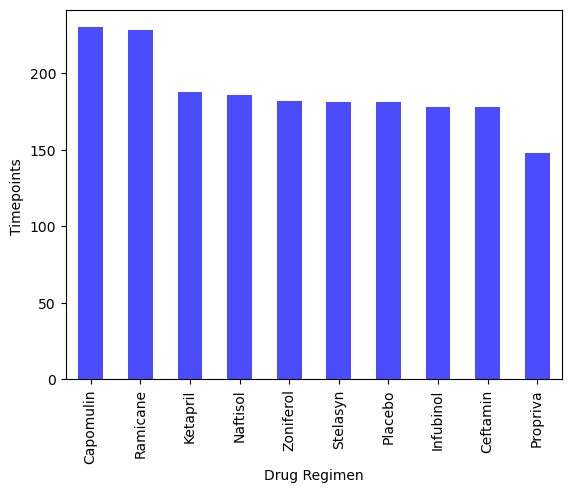

In [30]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas
regimen_counts = clean_df['Drug Regimen'].value_counts()
regimen_counts.plot(kind='bar', color='blue', alpha=0.7)

plt.xlabel('Drug Regimen')
plt.ylabel('Timepoints ')
plt.show()


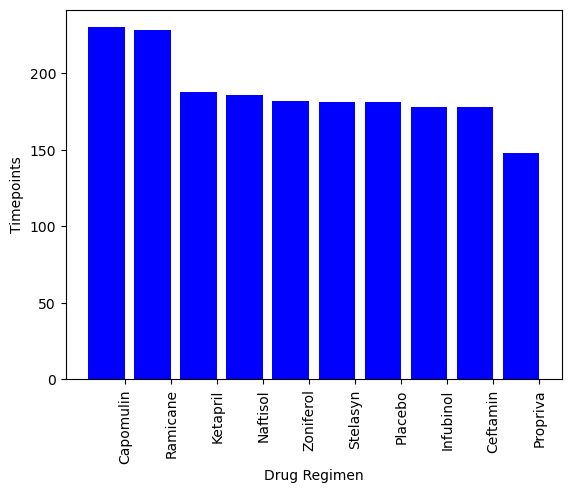

In [41]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_count = clean_df["Drug Regimen"].value_counts()
x_axis = range(len(regimen_count))
plt.bar(x_axis, clean_df['Drug Regimen'].value_counts(), color="b", align="center")
plt.xticks(tick_locations, regimen_count.index, rotation="vertical")
plt.xlabel('Drug Regimen')
plt.ylabel('Timepoints')
plt.show()



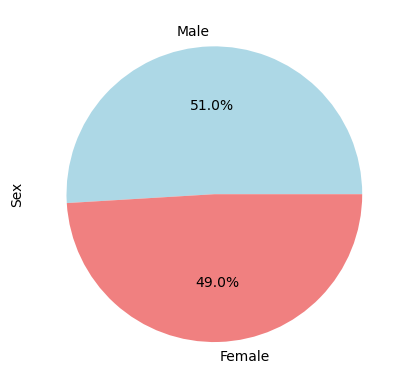

In [48]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_count = clean_df['Sex'].value_counts()
mice_count.plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], startangle=0)
plt.ylabel('Sex')
plt.show()

(-1.0999999297639522,
 1.0999999966554264,
 -1.099999910075619,
 1.0999999844482926)

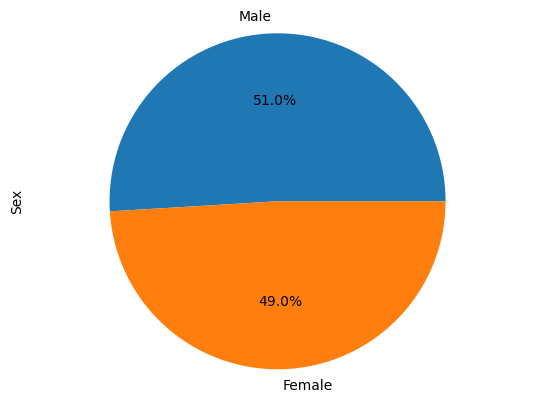

In [56]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male', 'Female']
plt.pie(mice_count, labels= labels,
        autopct="%1.1f%%", startangle=0)
plt.ylabel('Sex')
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [58]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
last_timepoint_df = clean_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(last_timepoint_df, clean_df, on=['Mouse ID', 'Timepoint'], how='inner')
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    tumor_vol = merged_df.loc[merged_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    tumor_vol_data.append(tumor_vol)
    quartiles = tumor_vol.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    
# Determine outliers using upper and lower bounds
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f"Potential outliers for {treatment}: {outliers}")

Potential outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Infubinol: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


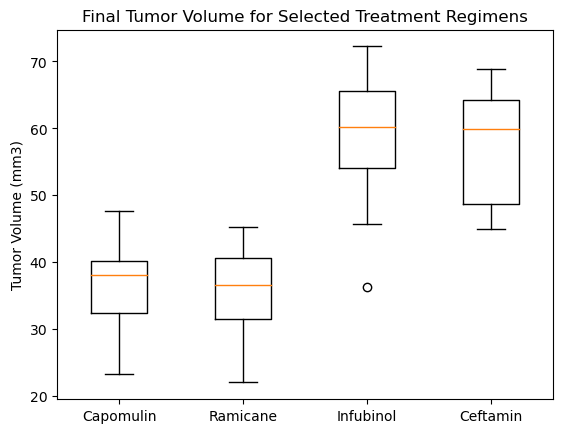

In [59]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels=treatments)
plt.title('Final Tumor Volume for Selected Treatment Regimens')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

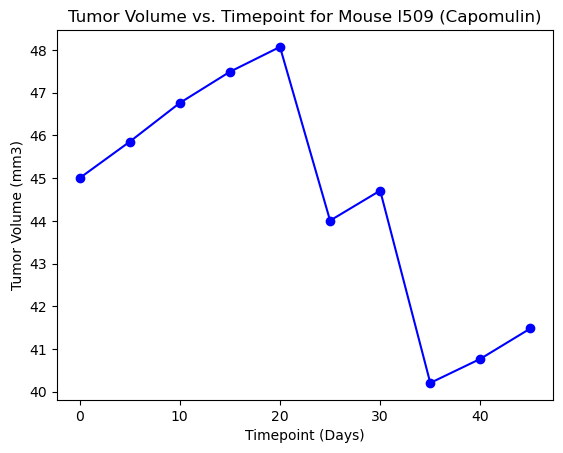

In [92]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
selected_mouse = clean_df.loc[(clean_df['Drug Regimen'] == 'Capomulin') & (clean_df['Mouse ID'] == 'l509')]
plt.plot(selected_mouse['Timepoint'], selected_mouse['Tumor Volume (mm3)'], marker='o', color='b')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume vs. Timepoint for Mouse {selected_mouse["Mouse ID"].values[0]} (Capomulin)')
plt.show()

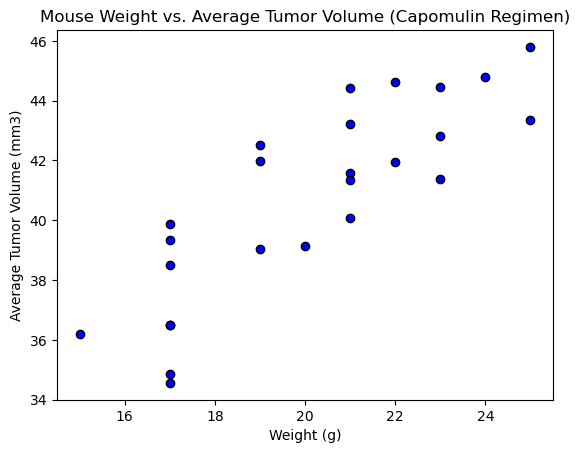

In [63]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_data = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

plt.scatter(mouse_weights, average_tumor_volume, marker='o', facecolors='blue', edgecolors='black')

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')

plt.show()


## Correlation and Regression

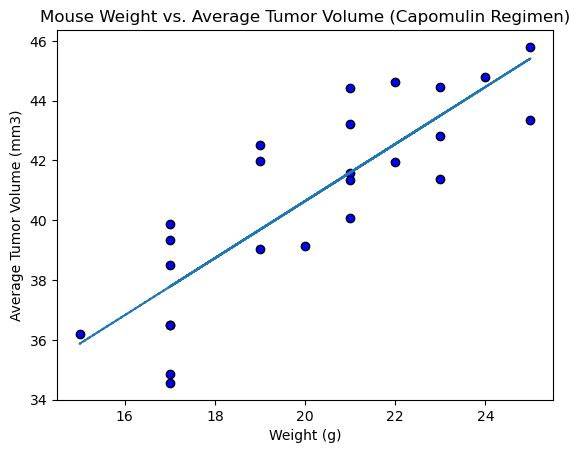

The correlation between mouse weight and average tumer volume is 0.8419363424694721


In [80]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

plt.scatter(mouse_weights, average_tumor_volume, marker='o', facecolors='blue', edgecolors='black')

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')

p_slope, p_int, p_r, p_p, p_std_err = st.linregress(mouse_weights, average_tumor_volume)

p_fit = p_slope * mouse_weights + p_int

plt.plot(mouse_weights,p_fit,"--")
plt.show()
print(f'The correlation between mouse weight and average tumer volume is {p_r}')